                              Model  Cosine_Similarity  Euclidean_Distance  \
0  paraphrase-distilroberta-base-v1           0.345150            7.555943   
0                 stsb-roberta-base           0.196038           25.826624   
0  paraphrase-distilroberta-base-v2           0.386855           19.490227   
0              all-roberta-large-v1           0.362660            1.128969   
0                       gtr-t5-base           0.592282            0.902493   

   Manhattan_Distance  
0          161.947886  
0          558.713255  
0          423.831867  
0           28.634116  
0           20.212389  


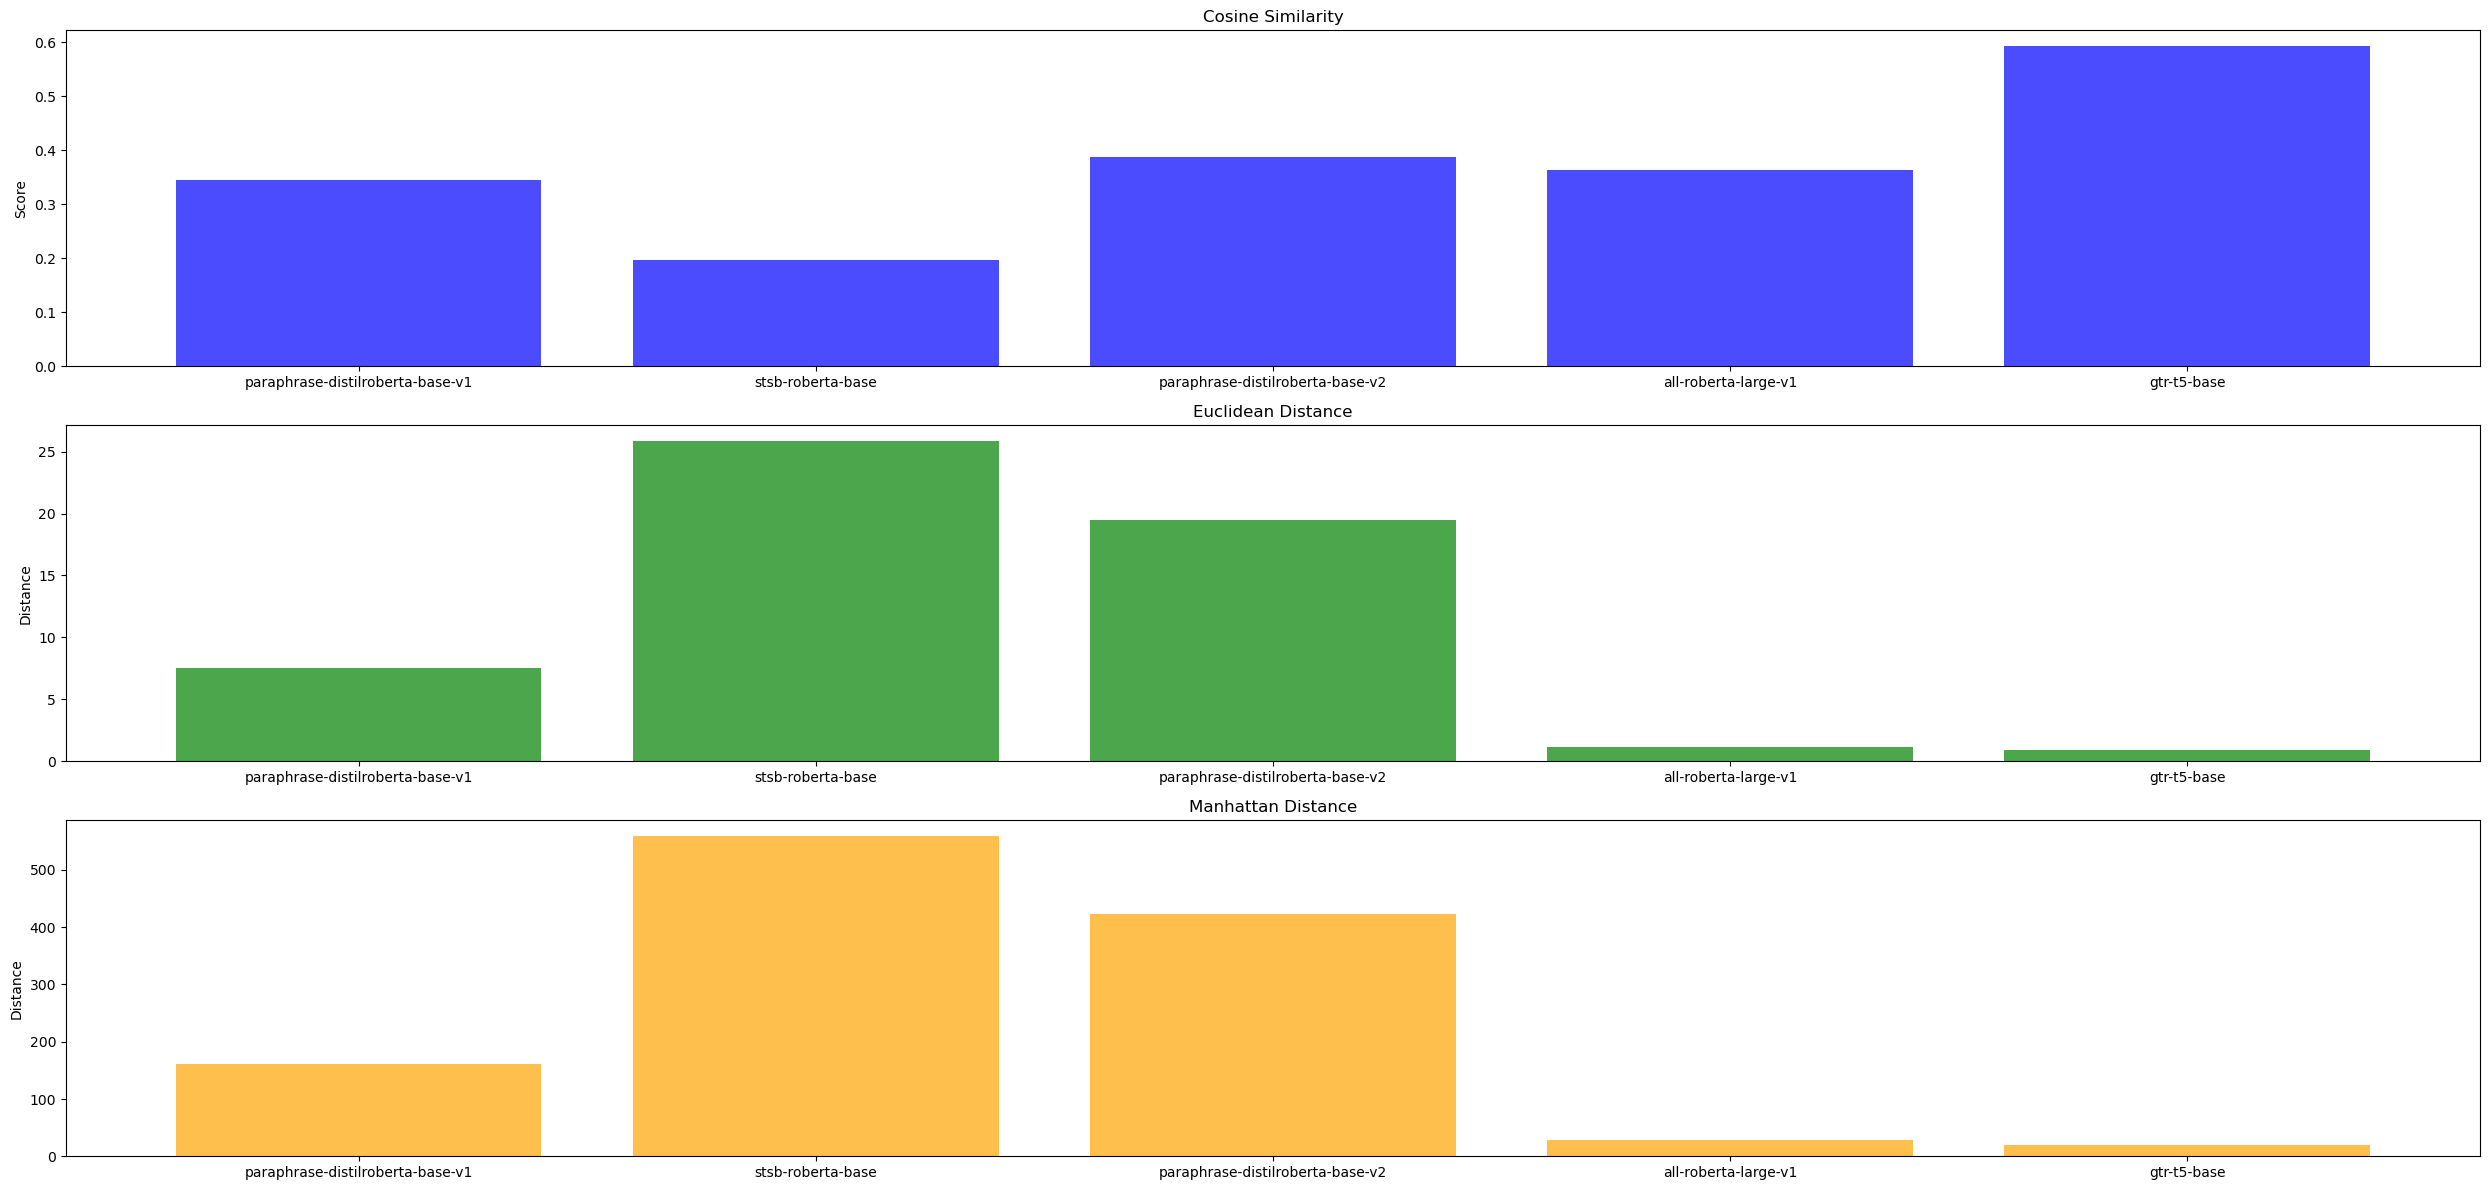

In [1]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import pandas as pd

sentences = [
    "I am very good.",
    "I like to play Cricket.",
    "Cricket is very good game.",
    "I play games."
]

# Define the models
model_names = ['paraphrase-distilroberta-base-v1',
               'stsb-roberta-base',
               'paraphrase-distilroberta-base-v2',
               'all-roberta-large-v1',
               'gtr-t5-base']

# Initialize an empty DataFrame to store cumulative results
cumulative_results_df = pd.DataFrame(columns=['Model', 'Cosine_Similarity', 'Euclidean_Distance', 'Manhattan_Distance'])

# Loop through each model
for model_name in model_names:
    # Load the model
    model = SentenceTransformer(f'sentence-transformers/{model_name}')

 # Encode sentences
    sentence_embeddings = model.encode(sentences)

    # Calculate cosine similarity
    cosine_sim_score = cosine_similarity([sentence_embeddings[0]], sentence_embeddings[1:]).mean()

    # Calculate Euclidean distance
    euclidean_dist = euclidean_distances([sentence_embeddings[0]], sentence_embeddings[1:]).mean()

    # Calculate Manhattan distance
    manhattan_dist = manhattan_distances([sentence_embeddings[0]], sentence_embeddings[1:]).mean()

    # Append results to the cumulative DataFrame
    cumulative_results_df = pd.concat([
        cumulative_results_df,
        pd.DataFrame({
            "Model": [model_name],
            "Cosine_Similarity": [cosine_sim_score],
            "Euclidean_Distance": [euclidean_dist],
            "Manhattan_Distance": [manhattan_dist]
  })
    ])

# Save the cumulative results to a CSV file
cumulative_results_df.to_csv('scores.csv', index=False)

# Display the cumulative results
print(cumulative_results_df)

# Plotting
plt.figure(figsize=(25, 12))

# Cosine Similarity
plt.subplot(3, 1, 1)
plt.bar(cumulative_results_df['Model'], cumulative_results_df['Cosine_Similarity'], color='blue', alpha=0.7)
plt.title('Cosine Similarity')
plt.ylabel('Score')

# Euclidean Distance
plt.subplot(3, 1, 2)
plt.bar(cumulative_results_df['Model'], cumulative_results_df['Euclidean_Distance'], color='green', alpha=0.7)
plt.title('Euclidean Distance')
plt.ylabel('Distance')
# Manhattan Distance
plt.subplot(3, 1, 3)
plt.bar(cumulative_results_df['Model'], cumulative_results_df['Manhattan_Distance'], color='orange', alpha=0.7)
plt.title('Manhattan Distance')
plt.ylabel('Distance')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('similar.png')

# Show the plot
plt.show()